# Q1. Behaviour of the Complex Plane

In [423]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [424]:
def mandel(c, i):
    z = c
    for l in range(i):
        z = z**2 + c
        
    mset = abs(z) < 50
    return mset

In [425]:
xl = np.linspace(-2, 2, 500)
yl = np.linspace(-2, 2, 500)

c = xl[:,np.newaxis]+yl[np.newaxis,:]*1j

mset = mandel(c, 50)
        

/Users/simonsmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/Users/simonsmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in square
  after removing the cwd from sys.path.
/Users/simonsmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


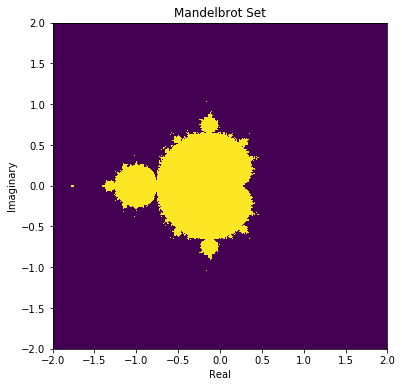

In [429]:
plt.figure(figsize = (6, 6))
plt.pcolormesh(xl, yl, mset.T, cmap='viridis')
plt.title("Mandelbrot Set")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.show()

# Q2. Epidemics

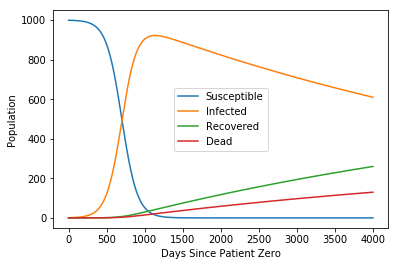

In [357]:
import scipy.integrate as itg

t = np.arange(0, 4000)
N = 1000

g = 0.0001 #how quickly do people recover
b = 0.01 #how infectious is the disease
a = 0.00005    #how deadly is the disease

I0 = 1
S0 = 999
D0 = 0
R0 = N - S0 - I0 - D0



def prime(iv, t, N, g, b):
    S, I, R, D = iv
    
    dSdt = -b*S*I/N
    dIdt = b*S*I/N - g*I - a*I
    dRdt = g*I
    dDdt = a*I
    
    return dSdt, dIdt, dRdt, dDdt

y0 = S0, I0, R0, D0

S, I, R, D = itg.odeint(prime, y0, t, args=(N, g, b)).T

plt.plot(S, label='Susceptible')
plt.plot(I, label='Infected')
plt.plot(R, label='Recovered')
plt.plot(D, label='Dead')
plt.xlabel("Days Since Patient Zero")
plt.ylabel("Population")
plt.legend()
#plt.title("Infectious, Slow Recovery, Somewhat Deadly")
#plt.savefig("withD.png")